In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
file = h5.File('points.h5','r')
nodes = file['node_coords']
x = file['x']
y = file['y']
nx = file['nx']
ny = file['ny']

cellFile = open('cells.txt', 'r')
lines = cellFile.readlines()
cells = []
for line in lines:
    if line == "\n":
        break
    nums = [int(i) for i in line.split(' ')]
    cells.append(nums)

In [3]:
fmask = [0, 1, 2, 3, 4, 4, 8, 11, 13, 14, 0, 5, 9, 12, 14]

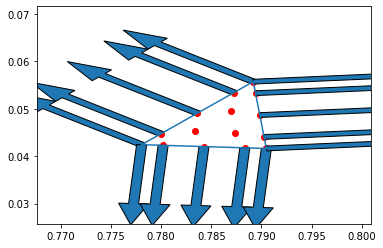

KeyboardInterrupt: Interrupted by user

In [4]:
for i in range(0, len(cells)):
    clear_output()
    cell = cells[i]
    #print(cell)
    #print(nodes[cell[0]])
    #print(nodes[cell[1]])
    #print(nodes[cell[2]])
    # Get min and max of nodes (to set axes)
    minx = min([nodes[cell[0]][0], nodes[cell[1]][0], nodes[cell[2]][0]])
    maxx = max([nodes[cell[0]][0], nodes[cell[1]][0], nodes[cell[2]][0]])
    miny = min([nodes[cell[0]][1], nodes[cell[1]][1], nodes[cell[2]][1]])
    maxy = max([nodes[cell[0]][1], nodes[cell[1]][1], nodes[cell[2]][1]])
    # Get x and y coords of solution points
    pts_x = x[i]
    pts_y = y[i]
    # Plot cell
    line0 = plt.Line2D([nodes[cell[0]][0], nodes[cell[1]][0]], [nodes[cell[0]][1], nodes[cell[1]][1]])
    line1 = plt.Line2D([nodes[cell[1]][0], nodes[cell[2]][0]], [nodes[cell[1]][1], nodes[cell[2]][1]])
    line2 = plt.Line2D([nodes[cell[2]][0], nodes[cell[0]][0]], [nodes[cell[2]][1], nodes[cell[0]][1]])
    plt.gca().add_line(line0)
    plt.gca().add_line(line1)
    plt.gca().add_line(line2)
    # Plot solution points
    plt.scatter(pts_x, pts_y, color="red")
    # Plot normals
    for j in range(0, len(fmask)):
        pt = fmask[j]
        factor = maxx - minx
        plt.arrow(pts_x[pt], pts_y[pt], factor * nx[i][j], factor * ny[i][j])
    # Set axes
    #plt.xlim([minx, maxx])
    #plt.ylim([miny, maxy])
    plt.show()
    
    input()